# Generators
MCS 275 Spring 2022 Lecture 43

In [1]:
def cubes(n):
    "Returns the cubes of the integers 0, 1, 2, ..., n-1"
    L = []
    for x in range(n):
        L.append(x**3)
    return L

In [2]:
cubes(5)

[0, 1, 8, 27, 64]

In [1]:
def lazy_cubes(n):
    "Generator that yields the cubes of the integers 0, 1, 2, ..., n-1"
    print("lazy_cubes() starting up...")
    for x in range(n):
        print("x={}, about to yield its cube".format(x))
        yield x**3
    print("lazy_cubes() ending")

In [2]:
cubes_generator = lazy_cubes(5)

In [3]:
for y in lazy_cubes(5):
    print("I got this value:",y)

lazy_cubes() starting up...
x=0, about to yield its cube
I got this value: 0
x=1, about to yield its cube
I got this value: 1
x=2, about to yield its cube
I got this value: 8
x=3, about to yield its cube
I got this value: 27
x=4, about to yield its cube
I got this value: 64
lazy_cubes() ending


Let's go back to a less chatty version.

In [4]:
def lazy_cubes(n):
    "Generator that yields the cubes of the integers 0, 1, 2, ..., n-1"
    for x in range(n):
        yield x**3

In addition to using it in a `for` loop, we can store the return value and use that as an iterable.

In [6]:
cubes_generator = lazy_cubes(5)

In [7]:
cubes_generator

<generator object lazy_cubes at 0x7f893a72c740>

In [8]:
for y in cubes_generator:
    print(y)

0
1
8
27
64


It's a one-shot process, though.  If we try to iterate again, the generator yields nothing.

In [10]:
for y in cubes_generator:
    print(y)

We can single-step a generator using `next()`.

In [12]:
g = lazy_cubes(4)
next(g)

0

In [13]:
next(g)

1

In [14]:
next(g)

8

In [15]:
next(g)

27

In [16]:
next(g)

StopIteration: 

A `for` loop is essentially equivalent to a `while` loop that breaks when it gets a `StopIteration`.

In [ ]:
for x in L:
    print(x)
else:
    print("hello")

In [ ]:
while True:
    try:
        x = next(L)
        print(x)
    except StopIteration:
        print("hello")
        break

## Infinite generators

A generator is not required to return.  It can yield values forever, thus representing an infinite sequence.

It isn't even necessary to be able to tell whether it's going to return or not.  This doesn't matter until we actually use it in a loop.

In [17]:
def allcubes():
    "Generator yielding the cubes of all nonnegative integers"
    n = 0
    while True:
        yield n**3
        n += 1

In [18]:
def cubes_with_digit7():
    "Generator yielding all the cubes that contain 7 as a decimal digit"
    for c in allcubes():
        if '7' in str(c):
            yield c


In [23]:
def cubes_with_digit7_and_at_most_4_digits():
    "Generator yielding the cubes containing 7 as a digit, and having at most 4 digits"
    for c in cubes_with_digit7():
        if c >= 10**4:
            return  # end generator
        yield c

In [24]:
for x in cubes_with_digit7_and_at_most_4_digits():
    print(x)

27
729
1728
2197
2744
3375


In [25]:
g = cubes_with_digit7_and_at_most_4_digits()

In [26]:
list(g)  # unlazification of a generator

[27, 729, 1728, 2197, 2744, 3375]

## Yield from

One generator can temporarily delegate the work to another, using `yield from`.

In [30]:
def powers_of(n):
    "Positive integer powers of n, starting with n**2"
    x = n**2
    while True:
        yield x
        x *= n

In [31]:
def powers_of_up_to(n,maxsize):
    "Positive integer powers of n, with exponent at least two, that are less than maxsize"
    for c in powers_of(n):
        if c >= maxsize:
            return
        yield c

In [32]:
def powers_up_to(maxsize):
    "Numbers less than maxsize that can be expressed as a power of an integer, with exponent at least 2"
    for base in range(2,maxsize+1):
        yield from powers_of_up_to(base,maxsize)

In [35]:
list(powers_up_to(300))

[4,
 8,
 16,
 32,
 64,
 128,
 256,
 9,
 27,
 81,
 243,
 16,
 64,
 256,
 25,
 125,
 36,
 216,
 49,
 64,
 81,
 100,
 121,
 144,
 169,
 196,
 225,
 256,
 289]

Notice how some numbers appear multiple times because they can be expressed as powers in multiple ways.  For example, 64 is both $8^2$ and $2^6$.  If we wanted no repeats, we could feed the results of this generator into the `set()` constructor, which stores only distinct elements.

In [41]:
set(powers_up_to(300))

{4,
 8,
 9,
 16,
 25,
 27,
 32,
 36,
 49,
 64,
 81,
 100,
 121,
 125,
 128,
 144,
 169,
 196,
 216,
 225,
 243,
 256,
 289}

In [67]:
def number_of_powers_less_than(n):
    "Number of distinct integers in [0,n] that are expressible as b**k for b nonnegative and k at least 2"
    return len(set(powers_up_to(n)))

In [44]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'N')

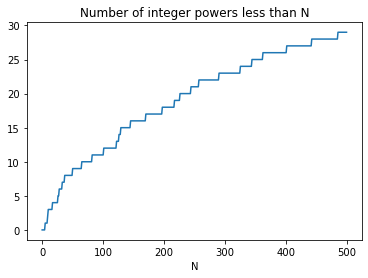

In [48]:
x = list(range(500))
y = [number_of_powers_less_than(t) for t in x]
plt.plot(x,y)
plt.title("Number of integer powers less than N")
plt.xlabel("N")

In [59]:
def fraction_cubes_containing7(n):
    total = 0
    contain7 = 0
    for c in allcubes():
        if c >= n:
            return contain7/total
        total += 1
        if '7' in str(c):
            contain7 += 1

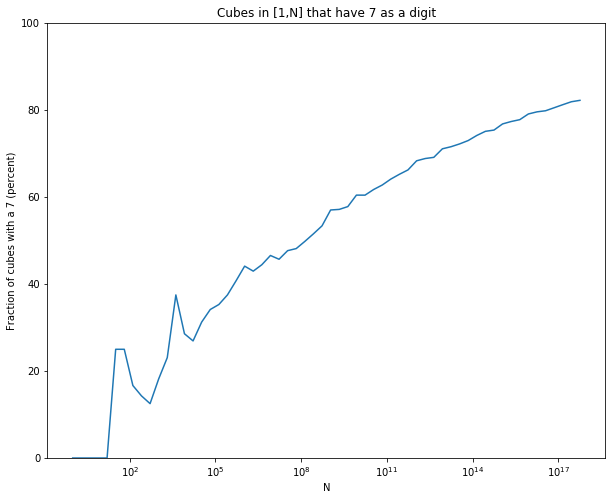

In [71]:
x = list( [ int(2**n) for n in range(60) ] )
y = [100*fraction_cubes_containing7(t) for t in x]
plt.figure(figsize=(10,8))
plt.plot(x,y)
plt.xscale("log")
plt.title("Cubes in [1,N] that have 7 as a digit")
plt.xlabel("N")
plt.ylabel("Fraction of cubes with a 7 (percent)")
plt.ylim(0,100)
plt.show()